HT2022: IL2230 HADL Lab 1
Handwritten Digits Recognition from MLP to CNN

3.3 Exploration
After the tutorial, you are going to design new CNNs in order to improve the classification
accuracy by considering the following adjustments:
1. Increase the number of feature maps. For example, C1 has 6 features maps. What
if you increase it to 8, 10, 12 feature maps? The same goes for C3, with 20, 24, 28
feature maps.

In [1]:
#First we will download the CIFAR10 dataset as we wil be working with it
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


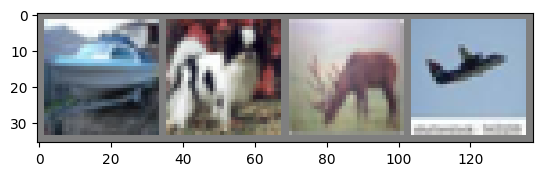

ship  dog   deer  plane


In [2]:
#Next we will display some images to verify the dataset
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

0
1
0
2
0
3
0
4
1
1
1
2
1
3
1
4
2
1
2
2
2
3
2
4
3
1
3
2
3
3
3
4


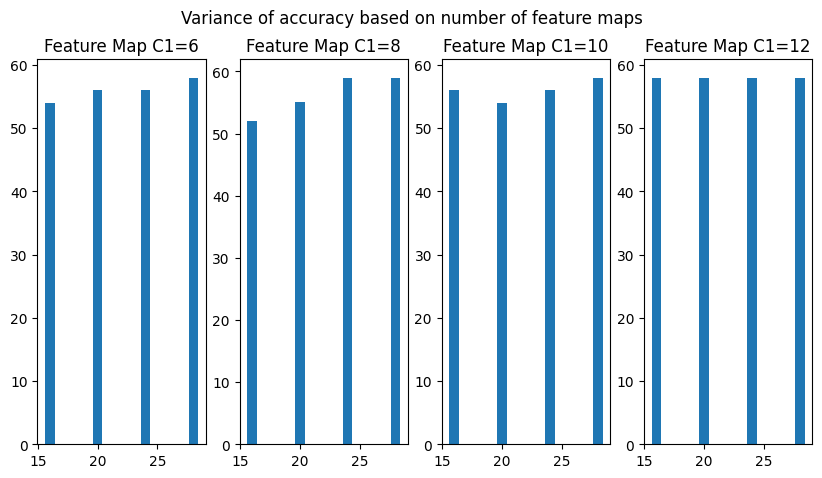

In [20]:
# We define a loop that will try different number of feature maps for the first convolutional layer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

n_of_featuremapsC1 = 4
n_of_featuremapsC2 = 4
feature_mapsC1 = [6,8,10,12]
feature_mapsC2 = [16,20,24,28]
accuracy = [[0 for f1 in range(n_of_featuremapsC1)] for f2 in range(n_of_featuremapsC2)]
c1 = 0
c2 = 0
for f1 in feature_mapsC1:
    for f2 in feature_mapsC2:
        class Net(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(3, f1, 5)
                self.pool = nn.MaxPool2d(2, 2)
                self.conv2 = nn.Conv2d(f1, f2, 5)
                self.fc1 = nn.Linear(f2 * 5 * 5, 120)
                self.fc2 = nn.Linear(120, 84)
                self.fc3 = nn.Linear(84, 10)

            def forward(self, x):
                x = self.pool(F.relu(self.conv1(x)))
                x = self.pool(F.relu(self.conv2(x)))
                x = torch.flatten(x, 1) # flatten all dimensions except batch
                x = F.relu(self.fc1(x))
                x = F.relu(self.fc2(x))
                x = self.fc3(x)
                return x
        net = Net()

        #Define a Loss function

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

        #Train the network
        for epoch in range(2):  # loop over the dataset multiple times

            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                # get the inputs; data is a list of [inputs, labels]
                inputs, labels = data

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                # print statistics
                running_loss += loss.item()
                #if i % 2000 == 1999:    # print every 2000 mini-batches
                #    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                #    running_loss = 0.0
        #Save the network

        PATH = './cifar_net.pth'
        torch.save(net.state_dict(), PATH)

        #Test the images

        correct = 0
        total = 0
        # since we're not training, we don't need to calculate the gradients for our outputs
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                # calculate outputs by running images through the network
                outputs = net(images)
                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
        accuracy[c1][c2] =  100 * correct // total
        c2 += 1
    c2 = 0
    c1 += 1
plt.figure(figsize=(10, 5))  # Adjust the width and height as needed

for j in range(n_of_featuremapsC1):
    plt.subplot(1, n_of_featuremapsC1, j+1)
    plt.bar(feature_mapsC2, accuracy[j])
    plt.title(f'Feature Map C1={feature_mapsC1[j]}')

plt.suptitle('Variance of accuracy based on number of feature maps')
plt.show()
        


2. Add more convolutional layers, turning the 7-layer neural network into a 9-layer,
11-layer, or 13-layer neural network. You are free to modify the filter size.

Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 17 %


Text(0.5, 1.0, 'Variance of accuracy based on number of layers in the network')

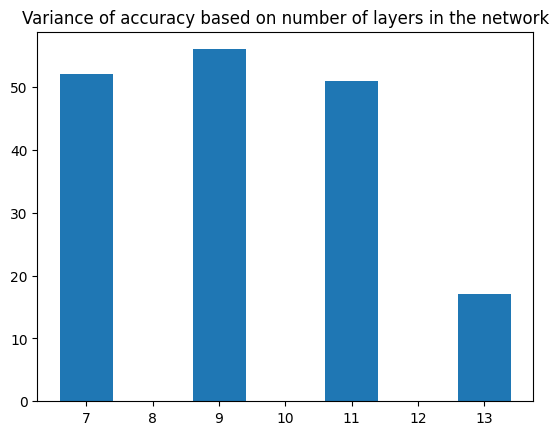

In [23]:
# We define a loop and for each iteration we try a different CNN with different number of layers

convolutional_layers = [7,9,11,13]
accuracy = []
for c in convolutional_layers :
    if c == 7:
        class Net(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(3, 6, 5)
                self.pool = nn.MaxPool2d(2, 2)
                self.conv2 = nn.Conv2d(6, 16, 5)
                self.fc1 = nn.Linear(16 * 5 * 5, 120)
                self.fc2 = nn.Linear(120, 84)
                self.fc3 = nn.Linear(84, 10)

            def forward(self, x):
                x = self.pool(F.relu(self.conv1(x)))
                x = self.pool(F.relu(self.conv2(x)))
                x = torch.flatten(x, 1) # flatten all dimensions except batch
                x = F.relu(self.fc1(x))
                x = F.relu(self.fc2(x))
                x = self.fc3(x)
                return x
    elif c == 9:
        class Net(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
                self.pool = nn.MaxPool2d(2, 2)
                self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
                self.conv3 = nn.Conv2d(16, 20, 5, padding=2)
                self.fc1 = nn.Linear(20 * 4 * 4, 120)
                self.fc2 = nn.Linear(120, 84)
                self.fc3 = nn.Linear(84, 10)

            def forward(self, x):
                x = self.pool(F.relu(self.conv1(x)))
                x = self.pool(F.relu(self.conv2(x)))
                x = self.pool(F.relu(self.conv3(x)))
                x = torch.flatten(x, 1) # flatten all dimensions except batch
                x = F.relu(self.fc1(x))
                x = F.relu(self.fc2(x))
                x = self.fc3(x)
                return x
    elif c == 11:
        class Net(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(3, 6, 3, padding=1)
                self.pool = nn.MaxPool2d(2, 2)
                self.conv2 = nn.Conv2d(6, 16, 3, padding=1)
                self.conv3 = nn.Conv2d(16, 20, 3, padding=1)
                self.conv4 = nn.Conv2d(20, 20, 3, padding=1)
                self.fc1 = nn.Linear(20 * 2 * 2, 120)
                self.fc2 = nn.Linear(120, 84)
                self.fc3 = nn.Linear(84, 10)

            def forward(self, x):
                x = self.pool(F.relu(self.conv1(x)))
                x = self.pool(F.relu(self.conv2(x)))
                x = self.pool(F.relu(self.conv3(x)))
                x = self.pool(F.relu(self.conv4(x)))
                x = torch.flatten(x, 1) # flatten all dimensions except batch
                x = F.relu(self.fc1(x))
                x = F.relu(self.fc2(x))
                x = self.fc3(x)
                return x
    if c == 13:
        class Net(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(3, 6, 3, padding=1)
                self.pool = nn.MaxPool2d(1, 1)
                self.conv2 = nn.Conv2d(6, 16, 3, padding=1)
                self.pool2 = nn.MaxPool2d(2, 2)
                self.conv3 = nn.Conv2d(16, 16, 3, padding=1)
                self.conv4 = nn.Conv2d(16, 20, 3, padding=1)
                self.conv5 = nn.Conv2d(20, 20, 3, padding=1)
                self.fc1 = nn.Linear(20 * 2 * 2, 120)
                self.fc2 = nn.Linear(120, 84)
                self.fc3 = nn.Linear(84, 10)

            def forward(self, x):
                x = self.pool(F.relu(self.conv1(x)))
                x = self.pool2(F.relu(self.conv2(x)))
                x = self.pool2(F.relu(self.conv3(x)))
                x = self.pool2(F.relu(self.conv4(x)))
                x = self.pool2(F.relu(self.conv5(x)))
                x = torch.flatten(x, 1) # flatten all dimensions except batch
                x = F.relu(self.fc1(x))
                x = F.relu(self.fc2(x))
                x = self.fc3(x)
                return x

    net = Net()

    #Define a Loss function

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    #Train the network
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            #if i % 2000 == 1999:    # print every 2000 mini-batches
            #    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            #    running_loss = 0.0

    #print('Finished Training')

    #Save the network

    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)

    #Test the images

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    #print(f'Accuracy of the network {} on the 10000 test images: {100 * correct // total} %')

    accuracy.append(100 * correct // total)
    
plt.bar(convolutional_layers, accuracy)
plt.title(f'Variance of accuracy based on number of layers in the network')

3. Experiment with different nonlinear activation functions. Instead of ReLu, try to
use sigmoid, tanh.

[1,  2000] loss: 2.205
[1,  4000] loss: 1.874
[1,  6000] loss: 1.675
[1,  8000] loss: 1.560
[1, 10000] loss: 1.518
[1, 12000] loss: 1.468
[2,  2000] loss: 1.390
[2,  4000] loss: 1.373
[2,  6000] loss: 1.335
[2,  8000] loss: 1.328
[2, 10000] loss: 1.283
[2, 12000] loss: 1.262
Finished Training
Accuracy of the network on the 10000 test images: 53 %
[1,  2000] loss: 2.317
[1,  4000] loss: 2.313
[1,  6000] loss: 2.314
[1,  8000] loss: 2.313
[1, 10000] loss: 2.311
[1, 12000] loss: 2.310
[2,  2000] loss: 2.310
[2,  4000] loss: 2.310
[2,  6000] loss: 2.309
[2,  8000] loss: 2.309
[2, 10000] loss: 2.308
[2, 12000] loss: 2.307
Finished Training
Accuracy of the network on the 10000 test images: 10 %
[1,  2000] loss: 2.017
[1,  4000] loss: 1.711
[1,  6000] loss: 1.601
[1,  8000] loss: 1.528
[1, 10000] loss: 1.498
[1, 12000] loss: 1.405
[2,  2000] loss: 1.372
[2,  4000] loss: 1.347
[2,  6000] loss: 1.316
[2,  8000] loss: 1.304
[2, 10000] loss: 1.270
[2, 12000] loss: 1.260
Finished Training
Accuracy

Text(0.5, 1.0, 'Variance of accuracy based on type of activation function')

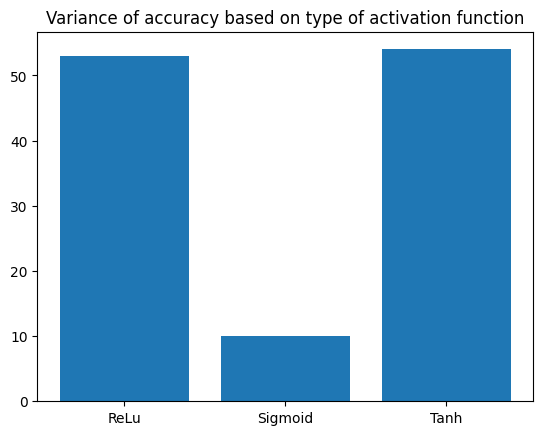

In [25]:
#We define a looo and for each iteration it will try a different activation function

activation_functions = [1,2,3]
names = ['ReLu', 'Sigmoid', 'Tanh']
accuracy = []
for a in activation_functions :
    if a == 1:
        class Net(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(3, 6, 5)
                self.pool = nn.MaxPool2d(2, 2)
                self.conv2 = nn.Conv2d(6, 16, 5)
                self.fc1 = nn.Linear(16 * 5 * 5, 120)
                self.fc2 = nn.Linear(120, 84)
                self.fc3 = nn.Linear(84, 10)

            def forward(self, x):
                x = self.pool(F.relu(self.conv1(x)))
                x = self.pool(F.relu(self.conv2(x)))
                x = torch.flatten(x, 1) # flatten all dimensions except batch
                x = F.relu(self.fc1(x))
                x = F.relu(self.fc2(x))
                x = self.fc3(x)
                return x
    elif a == 2:
        class Net(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(3, 6, 5)
                self.pool = nn.MaxPool2d(2, 2)
                self.conv2 = nn.Conv2d(6, 16, 5)
                self.fc1 = nn.Linear(16 * 5 * 5, 120)
                self.fc2 = nn.Linear(120, 84)
                self.fc3 = nn.Linear(84, 10)

            def forward(self, x):
                x = self.pool(F.sigmoid(self.conv1(x)))
                x = self.pool(F.sigmoid(self.conv2(x)))
                x = torch.flatten(x, 1) # flatten all dimensions except batch
                x = F.sigmoid(self.fc1(x))
                x = F.sigmoid(self.fc2(x))
                x = self.fc3(x)
                return x
    elif a == 3:
        class Net(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(3, 6, 5)
                self.pool = nn.MaxPool2d(2, 2)
                self.conv2 = nn.Conv2d(6, 16, 5)
                self.fc1 = nn.Linear(16 * 5 * 5, 120)
                self.fc2 = nn.Linear(120, 84)
                self.fc3 = nn.Linear(84, 10)

            def forward(self, x):
                x = self.pool(F.tanh(self.conv1(x)))
                x = self.pool(F.tanh(self.conv2(x)))
                x = torch.flatten(x, 1) # flatten all dimensions except batch
                x = F.tanh(self.fc1(x))
                x = F.tanh(self.fc2(x))
                x = self.fc3(x)
                return x

    net = Net()

    #Define a Loss function

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    #Train the network
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                #print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

    #print('Finished Training')

    #Save the network

    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)

    #Test the images

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    #print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

    accuracy.append(100 * correct // total)
plt.bar(names, accuracy)
plt.title(f'Variance of accuracy based on type of activation function')